# Análise dos dados do dataset dentro de Partidos sobre o perfil de filiação partidária


In [5]:
import pandas as pd
import numpy as np

Para poder realizar a leitura do arquivo ```perfil_filiacao_paridaria.csv``` é necessário aplicar algumas configurações em função do formato de encriptação:
- O CSV esta separado por ';' em vez de ','
- O formato de codificação não é UTF-8 e sim 'Latin 1'

In [6]:
df = pd.read_csv('/Users/willianribeiro/Documents/GitHub/analise_exploratoria_dados_tse/data/Partidos/perfil_filiacao_partidaria/perfil_filiacao_partidaria.csv', sep=';', encoding='Latin 1')

Primeriamente uma breve exploração a respeito de quais dados são compreendidos dentro deste dataset, vamos avaliar as primeiras 5 linhas:

In [7]:
df.head()

,DT_GERACAO,HH_GERACAO,NR_ANO_MES,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,...,DS_GENERO,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_OBJETO_OCUPACAO,NM_OCUPACAO,QT_FILIADO
0,05/12/2023,19:01,202311,36,AGIR,AGIR,AC,1007,BUJARI,9,...,FEMININO,5,25 a 34 anos,1,SOLTEIRO,5,ENSINO MÉDIO INCOMPLETO,74,"ESTUDANTE, BOLSISTA, ESTAGIÁRIA/ESTAGIÁRIO E A...",1
1,05/12/2023,19:01,202311,36,AGIR,AGIR,AC,1007,BUJARI,9,...,FEMININO,5,25 a 34 anos,1,SOLTEIRO,8,SUPERIOR COMPLETO,138,GERENTE,1
2,05/12/2023,19:01,202311,36,AGIR,AGIR,AC,1007,BUJARI,9,...,FEMININO,6,35 a 44 anos,3,CASADO,8,SUPERIOR COMPLETO,130,AGENTE ADMINISTRATIVO/ADMINISTRATIVA,1
3,05/12/2023,19:01,202311,36,AGIR,AGIR,AC,1007,BUJARI,9,...,FEMININO,6,35 a 44 anos,1,SOLTEIRO,3,ENSINO FUNDAMENTAL INCOMPLETO,74,"ESTUDANTE, BOLSISTA, ESTAGIÁRIA/ESTAGIÁRIO E A...",1
4,05/12/2023,19:01,202311,36,AGIR,AGIR,AC,1007,BUJARI,9,...,FEMININO,6,35 a 44 anos,1,SOLTEIRO,6,ENSINO MÉDIO COMPLETO,100,AGRICULTORA/AGRICULTOR,1


Vamos começar trabalhando com as colunas NR_PARTIDO e SG_PARTIDO que referem-se aos partidos existentes, e usar isso para montar um dicionário :)

In [8]:
numero_partido = df['NR_PARTIDO'].unique()

In [9]:
sigla_partido = df['SG_PARTIDO'].unique()

In [10]:
dicionario_partidos = {}
for index, partido in enumerate(sigla_partido):
    dicionario_partidos[partido] = numero_partido[index]

print(dicionario_partidos)

{'AGIR': 36, 'AVANTE': 70, 'CIDADANIA': 23, 'DC': 27, 'DEM': 25, 'MDB': 15, 'NOVO': 30, 'PATRIOTA': 51, 'PCB': 21, 'PCDOB': 65, 'PCO': 29, 'PDT': 12, 'PL': 22, 'PMB': 35, 'PMN': 33, 'PODE': 19, 'PP': 11, 'PRTB': 28, 'PSB': 40, 'PSC': 20, 'PSD': 55, 'PSDB': 45, 'PSOL': 50, 'PSTU': 16, 'PT': 13, 'PTB': 14, 'PV': 43, 'REDE': 18, 'REPUBLICANOS': 10, 'SOLIDARIEDADE': 77, 'UNIÃO': 44, 'UP': 80}


Vamos fazer uma breve analise a respeito do partido Novo

In [11]:
nome_partido = 'NOVO'
df_partido = df[df['SG_PARTIDO'] == nome_partido]
df_partido.head()

,DT_GERACAO,HH_GERACAO,NR_ANO_MES,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,...,DS_GENERO,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_OBJETO_OCUPACAO,NM_OCUPACAO,QT_FILIADO
2252670,05/12/2023,19:07,202311,30,NOVO,PARTIDO NOVO,AC,1023,PORTO ACRE,1,...,MASCULINO,4,21 a 24 anos,1,SOLTEIRO,6,ENSINO MÉDIO COMPLETO,76,OUTROS,1
2252671,05/12/2023,19:07,202311,30,NOVO,PARTIDO NOVO,AC,1058,BRASILÉIA,6,...,MASCULINO,5,25 a 34 anos,3,CASADO,8,SUPERIOR COMPLETO,25,ADVOGADA/ADVOGADO,1
2252672,05/12/2023,19:07,202311,30,NOVO,PARTIDO NOVO,AC,1074,CRUZEIRO DO SUL,4,...,MASCULINO,4,21 a 24 anos,1,SOLTEIRO,5,ENSINO MÉDIO INCOMPLETO,74,"ESTUDANTE, BOLSISTA, ESTAGIÁRIA/ESTAGIÁRIO E A...",1
2252673,05/12/2023,19:07,202311,30,NOVO,PARTIDO NOVO,AC,1074,CRUZEIRO DO SUL,4,...,MASCULINO,6,35 a 44 anos,1,SOLTEIRO,6,ENSINO MÉDIO COMPLETO,1158,TÉCNICA/TÉCNICO EM INFORMÁTICA,1
2252674,05/12/2023,19:07,202311,30,NOVO,PARTIDO NOVO,AC,1074,CRUZEIRO DO SUL,4,...,MASCULINO,6,35 a 44 anos,1,SOLTEIRO,8,SUPERIOR COMPLETO,9,MÉDICA/MÉDICO,1


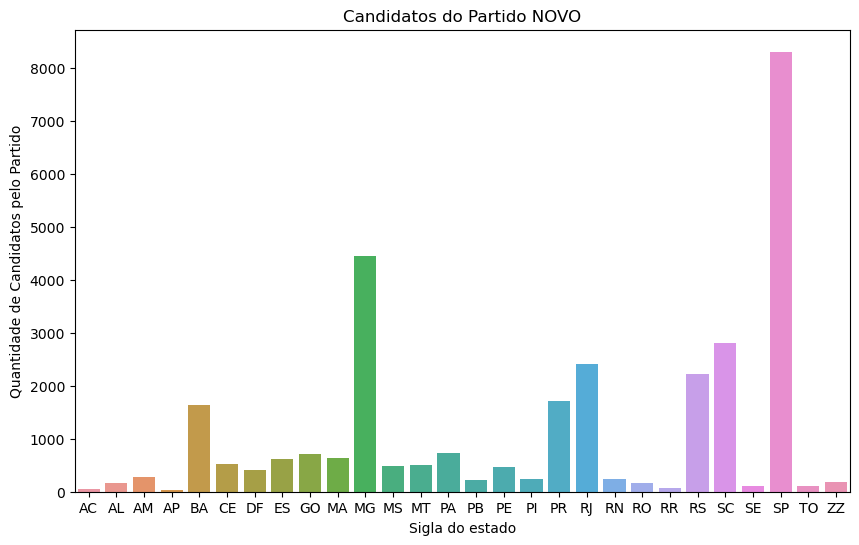

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(x=df_partido['SG_UF'])
plt.title(f"Candidatos do Partido {nome_partido}")
plt.xlabel("Sigla do estado")

plt.ylabel("Quantidade de Candidatos pelo Partido")
plt.show()

In [13]:
# Suponha que você tenha um DataFrame df_partido com uma coluna 'SG_UF' que contém as siglas dos estados
# Use a função value_counts() para contar o número de ocorrências de cada sigla
count_candidates = df_partido['SG_UF'].value_counts().reset_index()

# Renomeie as colunas para 'SIGLA' e 'Count_Candidates'
count_candidates.columns = ['SIGLA', 'Count_Candidates']

# Crie um novo DataFrame com as colunas 'SIGLA' e 'Count_Candidates'
df_novo = pd.DataFrame(count_candidates)

# Visualize o novo DataFrame
print(df_novo)

   SIGLA  Count_Candidates
0     SP              8305
1     MG              4452
2     SC              2804
3     RJ              2420
4     RS              2214
5     PR              1704
6     BA              1630
7     PA               725
8     GO               720
9     MA               639
10    ES               623
11    CE               531
12    MT               499
13    MS               489
14    PE               465
15    DF               410
16    AM               281
17    RN               236
18    PI               234
19    PB               217
20    ZZ               176
21    RO               172
22    AL               166
23    TO               115
24    SE               108
25    RR                70
26    AC                44
27    AP                41


https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/

shapefiles do ibge

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
shapefile_path = '/Users/willianribeiro/Documents/GitHub/analise_exploratoria_dados_tse/shapefiles/BR_Municipios_2021/BR_Municipios_2021.shp'
gdf = gpd.read_file(shapefile_path)



,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


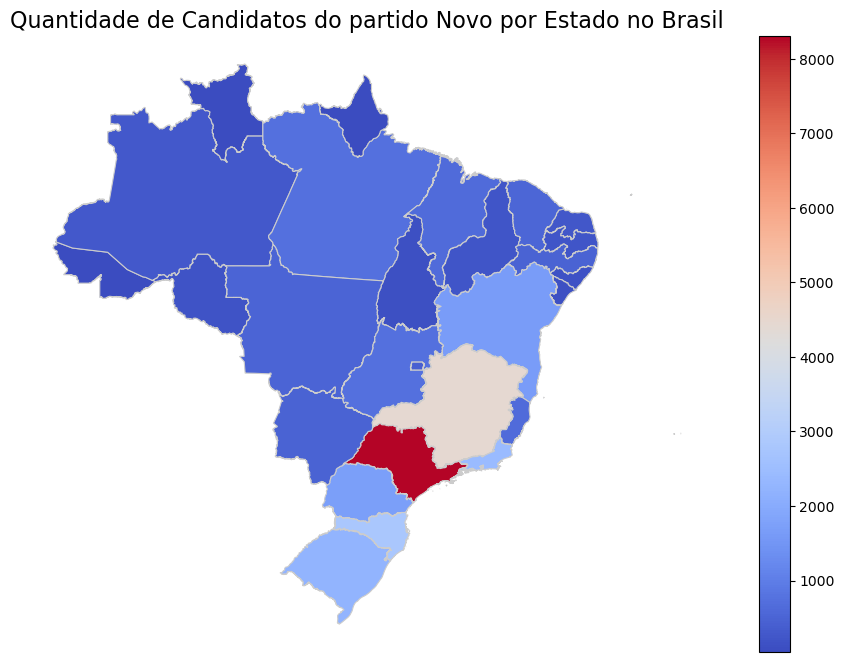

In [16]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def plot_br_map_with_counts(df_novo, shapefile_path):
    # Carregue o shapefile dos estados brasileiros
    gdf = gpd.read_file(shapefile_path)

    # Renomeie a coluna de siglas no DataFrame df_novo para 'SIGLA' para corresponder ao shapefile
    df_novo = df_novo.rename(columns={'SG_UF': 'SIGLA'})

    # Mesclar os dados do DataFrame com o shapefile usando a coluna 'SIGLA'
    merged = gdf.set_index('SIGLA').join(df_novo.set_index('SIGLA'))

    # Plot do mapa com a coloração
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column='Count_Candidates', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Configuração do título
    plt.title('Quantidade de Candidatos do partido Novo por Estado no Brasil', fontsize=16)

    # Remova os eixos
    ax.axis('off')

    # Mostrar o mapa
    plt.show()

# Exemplo de uso:
# Substitua 'caminho/para/seu/shapefile/BR_UF_2021.shp' pelo caminho do seu arquivo shapefile
shapefile_path = '/Users/willianribeiro/Documents/GitHub/analise_exploratoria_dados_tse/shapefiles/BR_UF_2021/BR_UF_2021.shp'
plot_br_map_with_counts(df_novo, shapefile_path)

In [17]:
# Suponha que você tenha um DataFrame df_partido com uma coluna 'SG_UF' que contém as siglas dos estados
# Use a função value_counts() para contar o número de ocorrências de cada sigla
count_candidates = df_partido['NM_MUNICIPIO'].value_counts().reset_index()

# Renomeie as colunas para 'SIGLA' e 'Count_Candidates'
count_candidates.columns = ['NM_MUNICIPIO', 'Count_Candidates']

# Crie um novo DataFrame com as colunas 'SIGLA' e 'Count_Candidates'
df_novo_cidades = pd.DataFrame(count_candidates)

# Visualize o novo DataFrame
print(df_novo_cidades)

           NM_MUNICIPIO  Count_Candidates
0             SÃO PAULO              2256
1        RIO DE JANEIRO              1127
2        BELO HORIZONTE               738
3              CURITIBA               527
4              BRASÍLIA               410
...                 ...               ...
2366               IVAÍ                 1
2367  ITAPEJARA D'OESTE                 1
2368         ITAMBARACÁ                 1
2369              IPORÃ                 1
2370         PORTO ACRE                 1

[2371 rows x 2 columns]


In [18]:
shapefile_path = '/Users/willianribeiro/Documents/GitHub/analise_exploratoria_dados_tse/shapefiles/BR_Municipios_2021/BR_Municipios_2021.shp'
gdf = gpd.read_file(shapefile_path)
gdf

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


Anotação, a geração por cidade falhou em função da diferença dos rótulos entre o DF do TSE e o do IBGE

In [4]:
df.head()

NameError: name 'df' is not defined

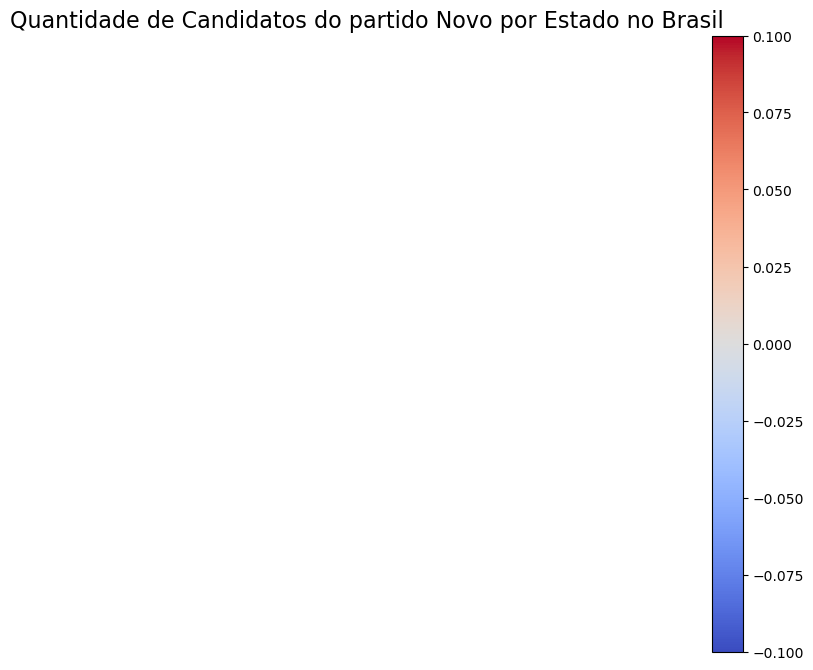

In [78]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def plot_br_map_with_counts(df_novo, shapefile_path):
    # Carregue o shapefile dos estados brasileiros
    gdf = gpd.read_file(shapefile_path)

    # Renomeie a coluna de siglas no DataFrame df_novo para 'SIGLA' para corresponder ao shapefile
    df_novo = df_novo.rename(columns={'CD_MUNICIPIO': 'CD_MUN'})

    # Mesclar os dados do DataFrame com o shapefile usando a coluna 'SIGLA'
    merged = gdf.set_index('CD_MUN').join(df_novo.set_index('CD_MUN'))

    # Plot do mapa com a coloração
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column='Count_Candidates', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Configuração do título
    plt.title('Quantidade de Candidatos do partido Novo por Estado no Brasil', fontsize=16)

    # Remova os eixos
    ax.axis('off')

    # Mostrar o mapa
    plt.show()

# Exemplo de uso:
# Substitua 'caminho/para/seu/shapefile/BR_UF_2021.shp' pelo caminho do seu arquivo shapefile
shapefile_path = '/Users/willianribeiro/Documents/GitHub/analise_exploratoria_dados_tse/shapefiles/BR_Municipios_2021/BR_Municipios_2021.shp'
plot_br_map_with_counts(df_novo_cidades, shapefile_path)

Algumas informações a respeito da distribuição de gênero do partido NOVO

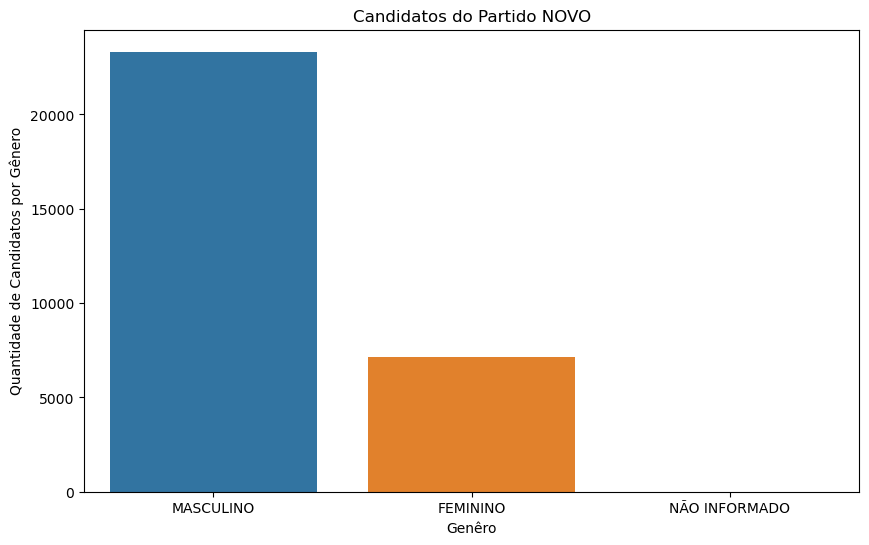

In [80]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(x=df_partido['DS_GENERO'])
plt.title(f"Candidatos do Partido {nome_partido}")
plt.xlabel("Genêro")

plt.ylabel("Quantidade de Candidatos por Gênero")
plt.show()

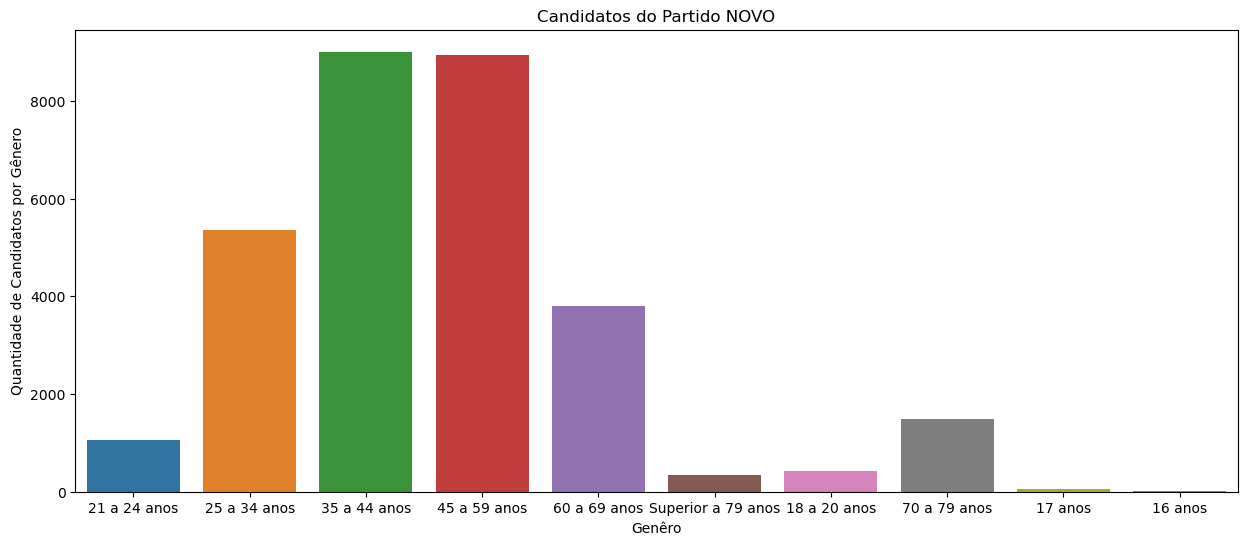

In [83]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
sns.countplot(x=df_partido['DS_FAIXA_ETARIA'])
plt.title(f"Candidatos do Partido {nome_partido}")
plt.xlabel("Faixa Etária")

plt.ylabel("Quantidade de Candidatos por Gênero")
plt.show()

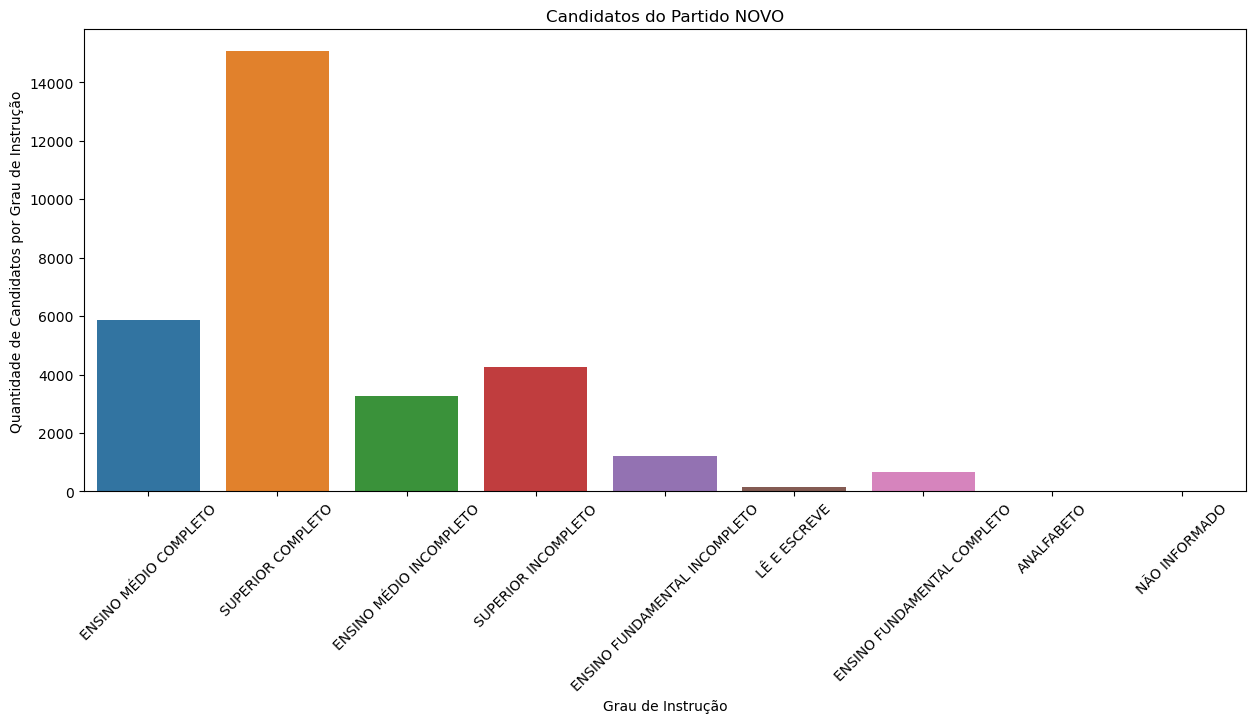

In [88]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
sns.countplot(x=df_partido['DS_GRAU_INSTRUCAO'])
plt.title(f"Candidatos do Partido {nome_partido}")
plt.xlabel("Grau de Instrução")
plt.xticks(rotation=45)
plt.ylabel("Quantidade de Candidatos por Grau de Instrução")
plt.show()